# Creating Visualisations using Matplotlib, Seaborn and Folium

Creating plots which answer questions for analysing "historical_automobile_sales" data to understand the historical trends in automobile sales during recession periods.<br>
recession period 1 - year 1980 <br>
recession period 2 - year 1981 to 1982<br>
recession period 3 - year 1991<br>
recession period 4 - year 2000 to 2001<br>
recession period 5 - year end 2007 to mid 2009<br>
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>

# Data Description

The dataset used for this visualization assignment contains *historical_automobile_sales* data representing automobile sales and related variables during recession and non-recession period. 

The dataset includes the following variables:
<br>1. Date: The date of the observation.
<br>2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
<br>3. Automobile_Sales: The number of vehicles sold during the period.
<br>4. GDP: The per capita GDP value in USD.
<br>5. Unemployment_Rate: The monthly unemployment rate.
<br>6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
<br>7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
<br>8. Price: The average vehicle price during the period.
<br>9. Advertising_Expenditure: The advertising expenditure of the company.
<br>10.Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar,                 Mediumfamilycar, Executivecar, Sports.
<br>11.Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
<br>12.Month: Month of the observation extracted from Date..
<br>13.Year: Year of the observation extracted from Date.
<br>
By examining various factors mentioned above from the dataset, you aim to gain insights into how recessions impacted automobile sales for your company.

In [3]:
# Import modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
import folium

In [4]:
# Import Data

df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv')

In [5]:
# Display dataframe

df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [6]:
# Display statistical summary

df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [7]:
# Display columns' names

df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

#### Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year

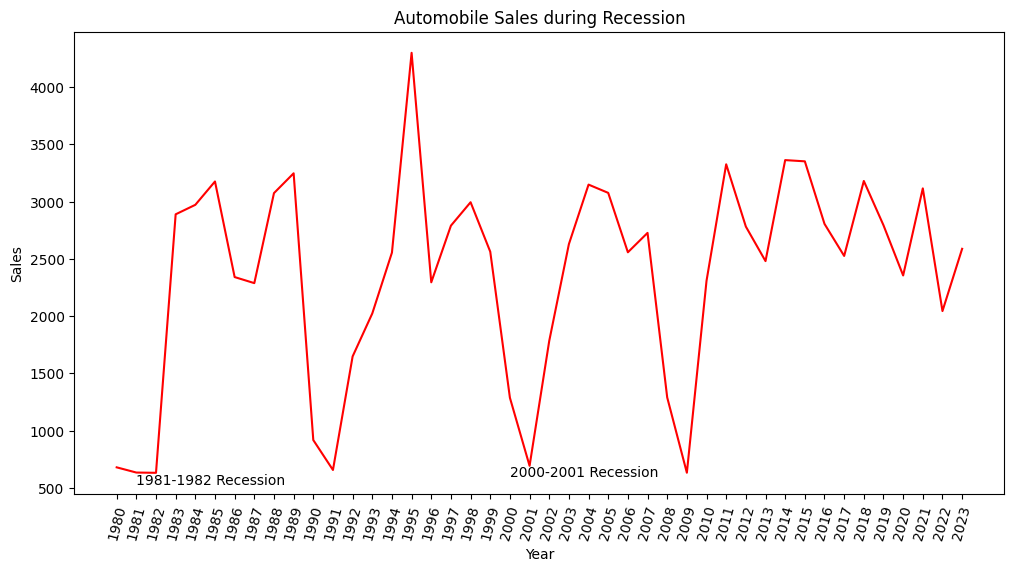

In [8]:
# Create years list to use it xsticks
years = list(range(1980,2024))

# Calculate the mean of automobile sales for each year using groupby
df_sales = df.groupby('Year')['Automobile_Sales'].mean()

# Create a new figure for the plot with size 12,6
plt.figure(figsize=(12,6))

# Plot the average automobile sales over the years as a line plot
df_sales.plot(kind= 'line', color= 'red')

# Set title and labels
plt.title('Automobile Sales during Recession')
plt.xlabel('Year')
plt.ylabel('Sales')

# Set custom tick marks on the x-axis, rotated for better readability
plt.xticks(years, rotation = 75)

# Add text annotations for recession periods
plt.text(1981, 525, '1981-1982 Recession')
plt.text(2000, 600, '2000-2001 Recession')

# Display the plot
plt.show()

#### Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?

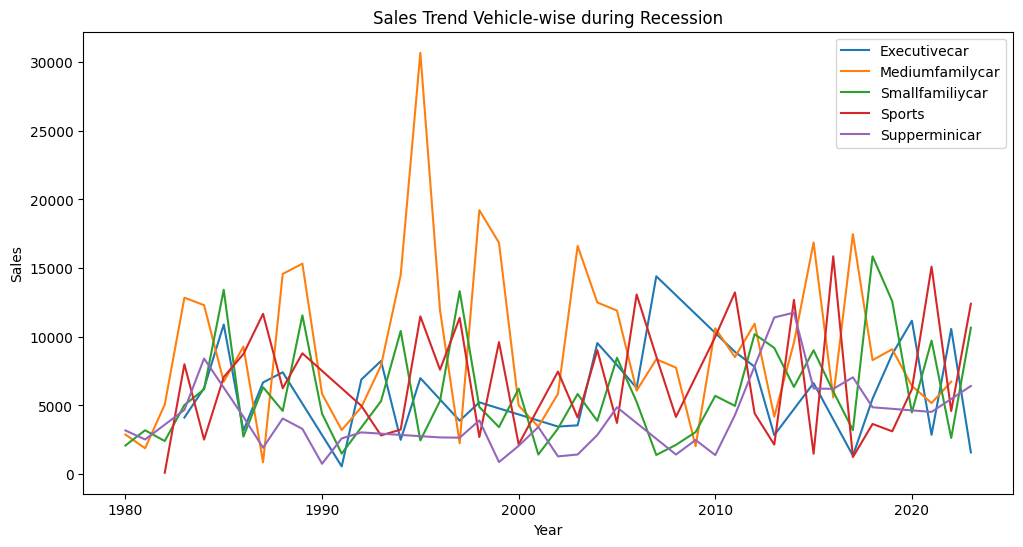

In [9]:
# Group the DataFrame by year and vehicle type, calculating the sum of automobile sales for each group
df_vehicle = df.groupby(['Year', 'Vehicle_Type'], as_index= False)['Automobile_Sales'].sum()

# Set the 'Year' column as the index of the DataFrame
df_vehicle.set_index('Year', inplace= True)

# Group the DataFrame again by 'Vehicle_Type' to plot separate lines for each vehicle type
df_vehicle2= df_vehicle.groupby(['Vehicle_Type'])['Automobile_Sales']

# Create a new figure for the plot with size 12,6
plt.figure(figsize=(12,6))

# Plot the sales trend for each vehicle type over the years as line plots
df_vehicle2.plot(kind= 'line')

# Set title and labels
plt.title('Sales Trend Vehicle-wise during Recession')
plt.xlabel('Year')
plt.ylabel('Sales')

# Display legend to differentiate between different vehicle types
plt.legend()

# Display the plot
plt.show()

<b> Inference: </b>

<p>From this plot, we can understand that during recession period, the sales for 'Sports type vehicles' declined because of the high cost of the vehicle, while sales of the superminicar and smallfamilycar increased.</p>